In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
data = pd.read_csv('c:\Users\Kishore\Desktop\Datasets\Edata.csv')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
# Quantity and UnitPrice
X = data.iloc[:,[3,5]].values

In [6]:
X

array([[ 6.  ,  2.55],
       [ 6.  ,  3.39],
       [ 8.  ,  2.75],
       ..., 
       [ 4.  ,  4.15],
       [ 4.  ,  4.15],
       [ 3.  ,  4.95]])

In [7]:
X.shape

(541909, 2)

In [8]:
X_new = X[10000:15000,:]

In [9]:
X_new.shape

(5000, 2)

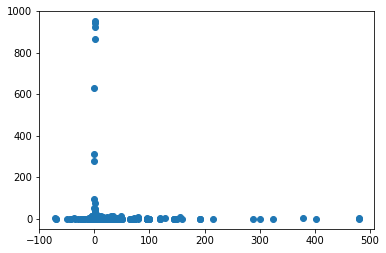

In [10]:
plt.scatter(X_new[:,0],X_new[:,1])

In [11]:
# Using dendrograms to find optimal level of clusters

import scipy.cluster.hierarchy as sch

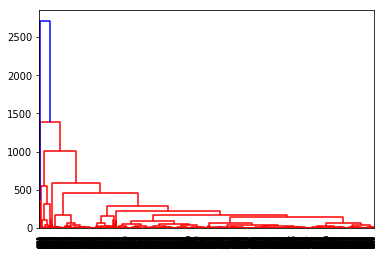

In [12]:
dendrogram = sch.dendrogram(sch.linkage(X_new,method = 'ward'))

In [13]:
# fitting hierarchical clustering to the data

from sklearn.cluster import AgglomerativeClustering

In [14]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [15]:
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x0330C7F0>)

In [16]:
y_hc = hc.fit_predict(X_new)

In [17]:
y_hc

array([0, 0, 0, ..., 0, 0, 0])

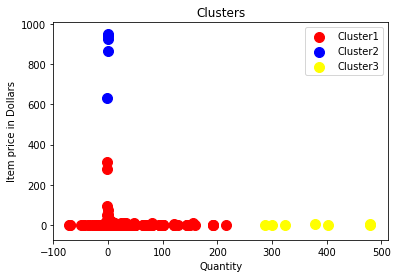

In [18]:
plt.scatter(X_new[y_hc == 0,0], X_new[y_hc == 0,1] , s=100, c = 'red',label = 'Cluster1')
plt.scatter(X_new[y_hc == 1,0], X_new[y_hc == 1,1] , s=100, c = 'blue',label = 'Cluster2')
plt.scatter(X_new[y_hc == 2,0], X_new[y_hc == 2,1] , s=100, c = 'yellow',label = 'Cluster3')
plt.title('Clusters')
plt.xlabel('Quantity')
plt.ylabel('Item price in Dollars')
plt.legend()
plt.show()
